#Upload the necessary packages for this analysis
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [9]:
df = pd.read_csv("C:/Users/danny/Downloads/Minnesota_EV_with_census_data2.csv", delimiter = ",", header = 0)

In [10]:
#First step of EDA is to examine the columns in the dataset and their associated data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_Code                 730 non-null    int64  
 1   Median_income            722 non-null    object 
 2   Population               722 non-null    float64
 3   TeslaCount               730 non-null    int64  
 4   NonTeslaCount            730 non-null    int64  
 5   Total_EVs                730 non-null    int64  
 6   Tesla_Proportion_of_Evs  730 non-null    float64
 7   EV_per_1k_people         721 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 45.8+ KB


In [11]:
#Change the Median income variable to int64 to be used as a continuous variable in regression analysis.
df["Median_income"] = pd.to_numeric(df["Median_income"], errors="coerce").astype("Int64")

In [12]:
#Verify that the Median income column is set to the int64 Dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_Code                 730 non-null    int64  
 1   Median_income            716 non-null    Int64  
 2   Population               722 non-null    float64
 3   TeslaCount               730 non-null    int64  
 4   NonTeslaCount            730 non-null    int64  
 5   Total_EVs                730 non-null    int64  
 6   Tesla_Proportion_of_Evs  730 non-null    float64
 7   EV_per_1k_people         721 non-null    float64
dtypes: Int64(1), float64(3), int64(4)
memory usage: 46.5 KB


In [13]:
#Examine the total range of the dataset
df.shape

(730, 8)

In [14]:
#The dataset size is 730 rows and 8 columns. Next is to examine any rows with null values, deduce whether they will impact our analysis 
#they will impact our analysis and decide whether or not to drop them.
rows_with_nulls = df[df.isnull().any(axis=1)]
print(rows_with_nulls)
rows_with_nulls.count()

     ZIP_Code  Median_income  Population  TeslaCount  NonTeslaCount  \
78      55111           <NA>        92.0           2             36   
98      55144           <NA>         NaN           0              1   
100     55155           <NA>        12.0           0             21   
233     55450           <NA>        27.0           0            171   
235     55458           <NA>         NaN           1              0   
236     55487           <NA>         NaN           1              0   
316     55816           <NA>         NaN           0              3   
320     55905           <NA>         0.0           0              3   
383     56002           <NA>         NaN           0              1   
537     56302           <NA>         NaN           1              2   
613     56459           <NA>         NaN           0              1   
661     56562           <NA>       461.0           0              2   
662     56563           <NA>      1130.0           0              2   
682   

ZIP_Code                   14
Median_income               0
Population                  6
TeslaCount                 14
NonTeslaCount              14
Total_EVs                  14
Tesla_Proportion_of_Evs    14
EV_per_1k_people            5
dtype: int64

In [15]:
#Focusing on the columns to be used in the regression, we find that the vast majority of Electric Vehicles in ZIP Codes with incomplete data
#belong to three; (55450, 55111)- associated with Minneapolis-Saint Paul International Airport. (55155)- associated with the Minnesota State Capitol.
print(rows_with_nulls.iloc[:,[0,1,2,5,7]])

     ZIP_Code  Median_income  Population  Total_EVs  EV_per_1k_people
78      55111           <NA>        92.0         38            413.04
98      55144           <NA>         NaN          1               NaN
100     55155           <NA>        12.0         21           1750.00
233     55450           <NA>        27.0        171           6333.33
235     55458           <NA>         NaN          1               NaN
236     55487           <NA>         NaN          1               NaN
316     55816           <NA>         NaN          3               NaN
320     55905           <NA>         0.0          3               NaN
383     56002           <NA>         NaN          1               NaN
537     56302           <NA>         NaN          3               NaN
613     56459           <NA>         NaN          1               NaN
661     56562           <NA>       461.0          2              4.34
662     56563           <NA>      1130.0          2              1.77
682     56619       

In [16]:
#In addition, ZIP Codes with null values for Median income were not found in the Census dataset, so all 14 rows will be removed.
#Drop rows in the dataset associated with the column containing the most null rows
df = df.dropna(subset=["Median_income"])

In [17]:
#View the result of the action
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ZIP_Code                 716 non-null    int64  
 1   Median_income            716 non-null    Int64  
 2   Population               716 non-null    float64
 3   TeslaCount               716 non-null    int64  
 4   NonTeslaCount            716 non-null    int64  
 5   Total_EVs                716 non-null    int64  
 6   Tesla_Proportion_of_Evs  716 non-null    float64
 7   EV_per_1k_people         716 non-null    float64
dtypes: Int64(1), float64(3), int64(4)
memory usage: 51.0 KB


In [18]:
#Choose variables for to analyze regression for the Median Income of a ZIP Code and the number of Electric Vehicles per 1K people in that area.
#We start with H0, the null hypothesis, that there is no relationship between the Median Income of a ZIP Code, and the number of Electric Vehicles
#per 1000 people. The alternative hypothesis of Ha, states that there IS a relationship between these two variables.
ols_data = df[["Median_income", "EV_per_1k_people"]]

In [19]:
#First 10 rows of the two variables in our analysis.
ols_data.head(10)

,Median_income,EV_per_1k_people
0,130625,39.40
1,115781,12.67
2,109464,7.10
3,64167,3.35
4,66875,2.20
5,83209,6.90
6,89023,5.70
7,126957,7.51
8,93500,7.70
9,99898,9.88


In [20]:
#Our dependent variable "y" is the EV_per_1k_people, this will be influenced by the independent variable "x", the Median_income.
ols_formula = "EV_per_1k_people ~ Median_income"

In [21]:
#The dataframe containing these two variables and the formula to model the relationship between them comprise the Ordinary Least Squares method
OLS = ols(formula = ols_formula, data = ols_data)

In [22]:
#The data is fit into the model variable.
model = OLS.fit()

In [23]:
#Finally, take the summary of the model variable to get the results of the OLS Regression analysis.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       EV_per_1k_people   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     486.7
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.21e-82
Time:                        21:17:40   Log-Likelihood:                -2465.0
No. Observations:                 716   AIC:                             4934.
Df Residuals:                     714   BIC:                             4943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -14.2287      1.031    -13.806      0.000     -16.252     -12.205
Median_income     0.0003    1.2e-05     22.061      0.000       0.000       0.000
==============================================================================
Omnibus:                      643.856   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32422.307
Skew:                           3.796   Prob(JB):                         0.00
Kurtosis:                      35.080   Cond. No.                     3.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#The results of the OLS Least squares analysis reveals a y-intercept of -14.2287, and a slope of 0.0003.
#This leads to a formula (y = mx + b) of: EV_per_1k_people = 0.0003*(per dollar increase in Median_income) - 14.2287
#The R-squared value of 0.405 reveals a moderate, positive correlation between the median income of a ZIP Code and EVs per 1000 people.

#To put this in perspective, for every $1000 increase in the median income of a select ZIP Code, the number of EVs
#increases by 0.3 cars per 1000 people. 

<Axes: xlabel='Median_income', ylabel='EV_per_1k_people'>

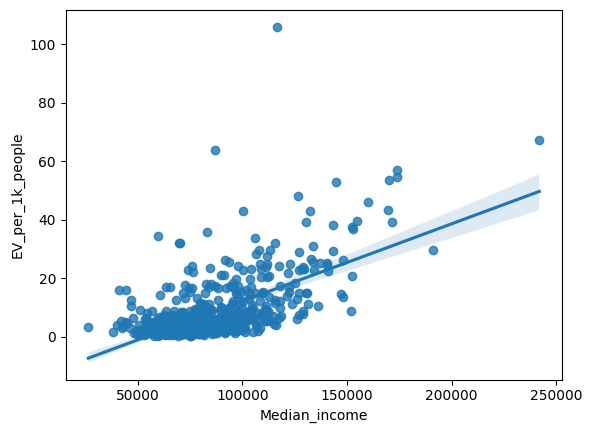

In [25]:
#Plotting the data on a graph displaying the best fit line of regression leads to a decent linear relationship, confirming the assumption of linearity.
sns.regplot(x = 'Median_income', y = 'EV_per_1k_people' , data = ols_data)

In [26]:
#Plotting the data on a graph displaying the best fit line of regression leads to a decent linear relationship, confirming the assumption of linearity.

#We then move on to finding the residuals to fulfill the assumption of normality.
residuals = model.resid

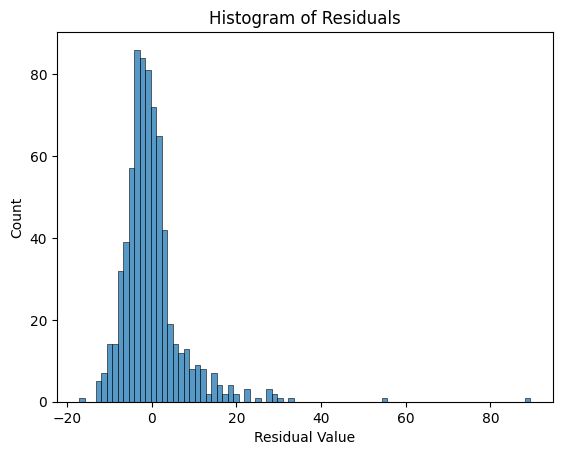

In [32]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

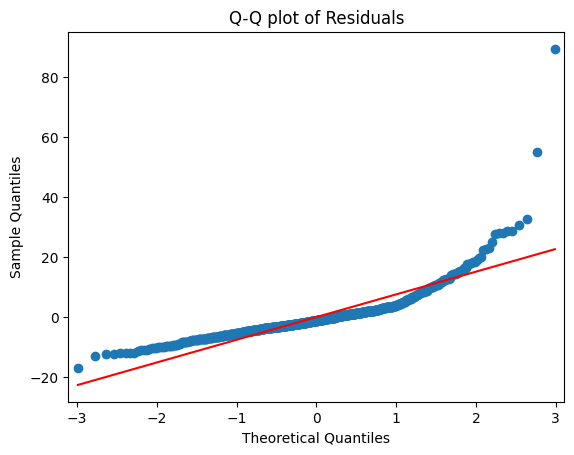

In [33]:
#A Q-Q plot assists in proving the normality assumption even further.
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [35]:
#The points lean closely around the upward trending diagonal line, which is ideal in the normality assumption
fitted_values = model.predict(ols_data["Median_income"])

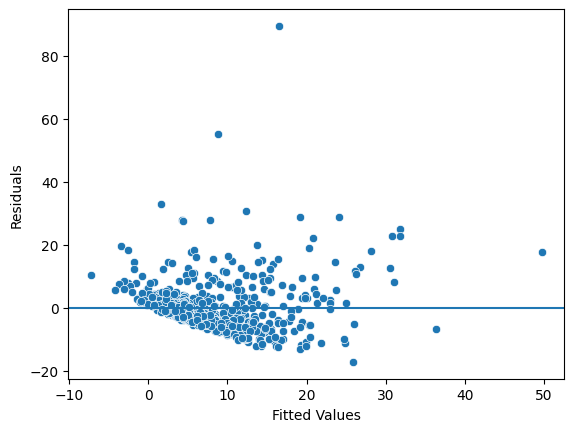

In [36]:
#Plotting residuals against fitted values allows us to test the assumption of homoscedasticity.
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

In [62]:
#There appears to be a cloud-shape contour with no real pattern, so this passes assumption of homoscedasticity.

#Let's do a second OLS regression, this time finding the relationship between the Median income of a ZIP code, and the proportion
#of Electric Vehicles that are Tesla models. Do richer ZIP Codes have a higher percentage of registered EVs to be Tesla models?

#We start with H0, the null hypothesis, that there is no relationship between the Median Income of a ZIP Code, and the proportion of Electric
#vehicles that belong to Tesla models. The alternative hypothesis of Ha, states that there IS a relationship between these two variables.

#Important note, we filter out ZIP Codes having under 10 EVs, since the proportion ratios for these data points can grossly throw off our analysis
df2 = df.query('Total_EVs > 10')
ols_data2 = df2[["Median_income", "Tesla_Proportion_of_Evs"]]

In [63]:
#First 10 rows of the two variables in our analysis.
ols_data2.head(10)

,Median_income,Tesla_Proportion_of_Evs
0,130625,0.288
1,115781,0.294
2,109464,0.286
3,64167,0.308
5,83209,0.272
6,89023,0.234
7,126957,0.367
8,93500,0.400
9,99898,0.333
10,98952,0.410


In [42]:
#Our dependent variable "y" is the EV_per_1k_people, this will be influenced by the independent variable "x", the Median_income.
ols_formula2 = "Tesla_Proportion_of_Evs ~ Median_income"

In [64]:
OLS = ols(formula = ols_formula2, data = ols_data2)

In [65]:
model = OLS.fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Tesla_Proportion_of_Evs   R-squared:                       0.184
Model:                                 OLS   Adj. R-squared:                  0.182
Method:                      Least Squares   F-statistic:                     76.82
Date:                     Thu, 24 Jul 2025   Prob (F-statistic):           9.09e-17
Time:                             22:10:48   Log-Likelihood:                 295.69
No. Observations:                      342   AIC:                            -587.4
Df Residuals:                          340   BIC:                            -579.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1382      0.019      7.203      0.000       0.100       0.176
Median_income  1.742e-06   1.99e-07      8.765      0.000    1.35e-06    2.13e-06
==============================================================================
Omnibus:                        3.817   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.884
Skew:                          -0.151   Prob(JB):                        0.143
Kurtosis:                       3.426   Cond. No.                     3.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='Median_income', ylabel='Tesla_Proportion_of_Evs'>

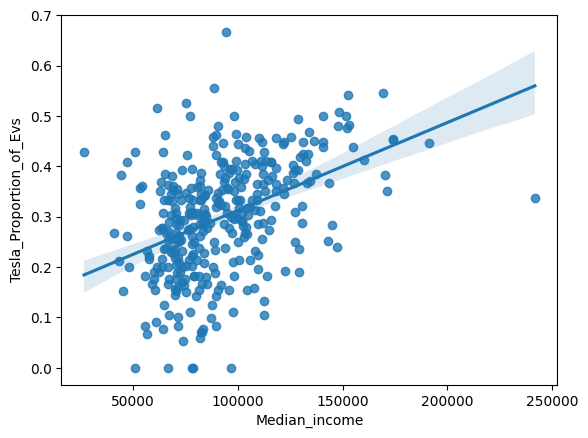

In [67]:
#With an R-squared of 0.184, the correlation, albeit positive, is far weaker between Median income of a ZIP Code and Tesla proportion of EVs
#This raises doubt that wealthier individuals or communitites are more likely to select Teslas as their EV of choice.
#In our SQL analysis, we found that many of the top EV brands included BMW and Rivian, luxury vehicle brands that are associated with higher prices.
#On the flip side- among Tesla EVs- roughly one-third belong to Model 3, often considered the baseline Tesla model with a decent starting price.
sns.regplot(x="Median_income", y="Tesla_Proportion_of_Evs", data=ols_data2)

In [68]:
residuals = model.resid

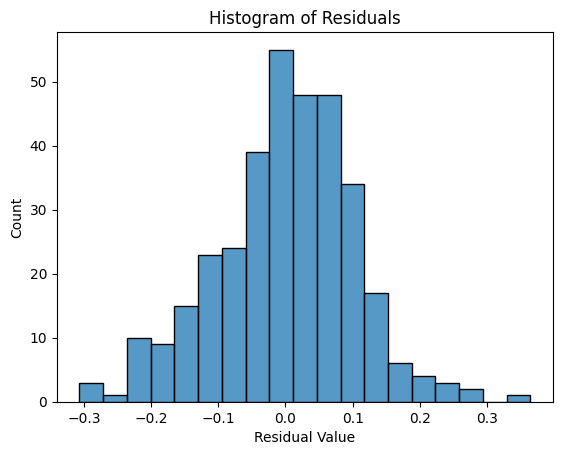

In [69]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

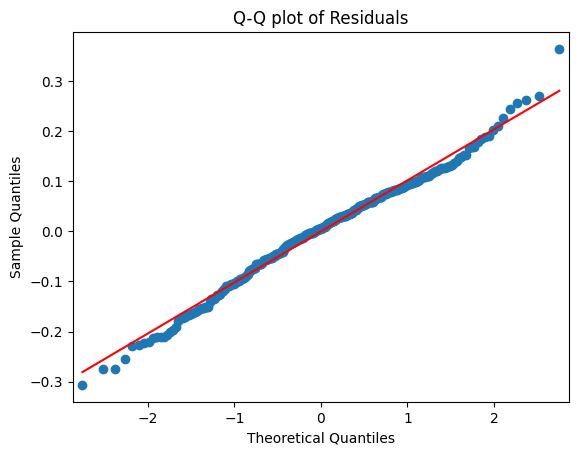

In [73]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [74]:
fitted_values = model.predict(ols_data["Median_income"])

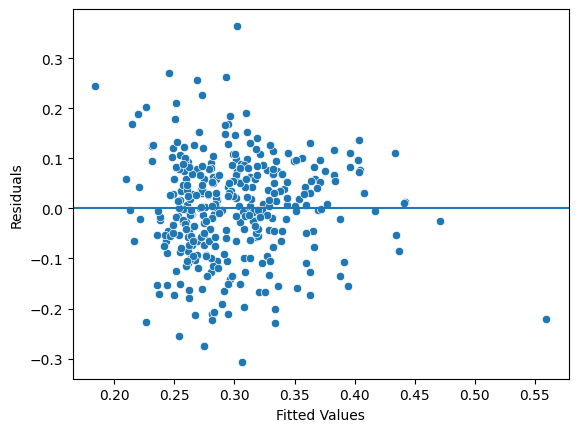

In [75]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()
#All four assumptions of homoscedasticity, linearity, independent observations, and normality appear to be met.

#For both OLS Regression analyses, we find a positive correlation between the Median income of a ZIP Code, the x variable, 
#and the y variable, be it either the proportion of electric vehicles, or the number of electric vehicles per 1000 people.
#Results for both tests are significantly significant, with p-values of 0.000, well below the threshold of 0.05.
#Therefore, we reject the null hypothesis that there is no association between median income and number of electric vehicles per 1000 people.
#We also reject the null hypothesis that there is no association between median income and the proportion of EVs that are Tesla models.